In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
print(train.shape,'  ',test.shape)

(348978, 51)    (523466, 50)


In [4]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

In [5]:
print(train.columns,'  ',train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348978 entries, 0 to 348977
Data columns (total 51 columns):
transaction_id    348978 non-null object
num_var_1         348978 non-null float64
num_var_2         348978 non-null float64
num_var_3         348978 non-null float64
num_var_4         348978 non-null float64
num_var_5         348978 non-null float64
num_var_6         348978 non-null float64
num_var_7         348978 non-null float64
cat_var_1         333196 non-null object
cat_var_2         348978 non-null object
cat_var_3         305125 non-null object
cat_var_4         348978 non-null object
cat_var_5         348978 non-null object
cat_var_6         348978 non-null object
cat_var_7         348978 non-null object
cat_var_8         239240 non-null object
cat_var_9         348978 non-null object
cat_var_10        348978 non-null object
cat_var_11        348978 non-null object
cat_var_12        348978 non-null object
cat_var_13        348978 non-null object
cat_var_14        348

In [6]:
print(train.isnull().sum())

transaction_id         0
num_var_1              0
num_var_2              0
num_var_3              0
num_var_4              0
num_var_5              0
num_var_6              0
num_var_7              0
cat_var_1          15782
cat_var_2              0
cat_var_3          43853
cat_var_4              0
cat_var_5              0
cat_var_6              0
cat_var_7              0
cat_var_8         109738
cat_var_9              0
cat_var_10             0
cat_var_11             0
cat_var_12             0
cat_var_13             0
cat_var_14             0
cat_var_15             0
cat_var_16             0
cat_var_17             0
cat_var_18             0
cat_var_19             0
cat_var_20             0
cat_var_21             0
cat_var_22             0
cat_var_23             0
cat_var_24             0
cat_var_25             0
cat_var_26             0
cat_var_27             0
cat_var_28             0
cat_var_29             0
cat_var_30             0
cat_var_31             0
cat_var_32             0


In [7]:

def plot(x=None, y=None, hue=None, data=None,name='',barplot=False,countplot=False,boxplot=False,factorplot=False):
    data=pd.DataFrame(data)
    try:
        print(name,'\n')
        data[x].hist()
        plt.show()
    except:
        print('cannot plot histogram\n')
    
    try:
        print(name,'\n')
        sns.distplot(train[x])
        plt.show()
    except:
        print('cannot plot distplot\n')
        
    if barplot:
        try:
            print(name,'\n')
            sns.barplot(x=x,y=y,hue=hue,data=data)
            plt.show()
        except:
            print('cannot plot barplot\n')
    if countplot:        
        try:
            print(name,'\n')
            sns.countplot(data[x])
            plt.show()
        except:
            print('cannot plot countplot\n')
    if boxplot:        
        try:
            print(name,'\n')
            sns.boxplot(x=x,y=y,hue=hue,data=data)
            plt.show()
        except:
            print('cannot plot boxplot\n')  
    if factorplot:        
        try:
            print(name,'\n')
            data=pd.DataFrame(data)
            sns.factorplot(x=x,y=y,data=data,size=14)
            plt.show()
        except:
            print('cannot plot factorplot\n')  
            
def plotHeatMap(df, size=(16,9),an=True):
    plt.figure(figsize=size)
    cmap = plt.cm.viridis
    sns.heatmap(df.corr(),cmap=cmap,linewidths=0.2,vmax=1, linecolor="white", square=True,annot=an)
    plt.show()
    
def treat(tmp):
    if tmp!=tmp:
        return 'unknown'
    else:
        return tmp

# Exploring Missing features

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()
train['cat_var_1_le']=train['cat_var_1'].apply(lambda x:treat(x))
train['cat_var_1_le']=le.fit_transform(train['cat_var_1_le'])

In [10]:
train['cat_var_1_le'].head()

0    423
1     65
2    127
3    423
4     65
Name: cat_var_1_le, dtype: int64

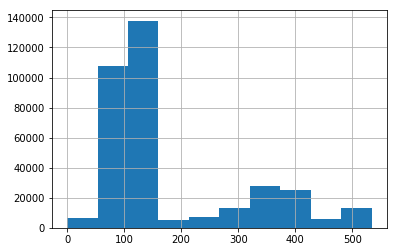

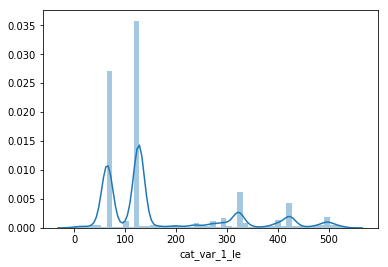

In [11]:
plot(x='cat_var_1_le',y='target',data=train)

In [12]:
# len(train['cat_var_1'][train['cat_var_1_le']==423])
#  Hence our unknown value is label encoded as 423

Treating cat_var_3

In [13]:
len(set(train['cat_var_1']).intersection(set(train['cat_var_3'])))

531

In [14]:
len(set(train['cat_var_3']))

617

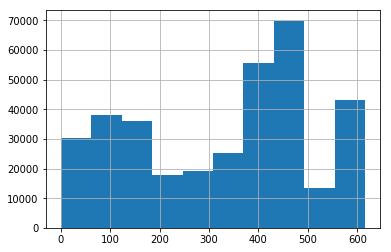

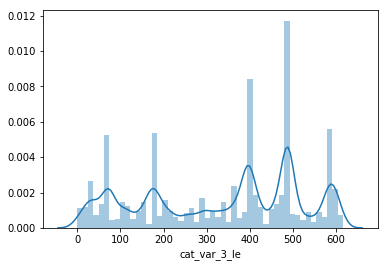

In [15]:
train['cat_var_3_le']=train['cat_var_3'].apply(lambda x:treat(x))
train['cat_var_3_le']=le.fit_transform(train['cat_var_3_le'])
plot(x='cat_var_3_le',y='target',data=train)

In [16]:
cntr=Counter(train['cat_var_1'])
cntr1=Counter(train['cat_var_3'])

In [17]:
train['cat_var_8'].head()

0    NaN
1    NaN
2     dn
3     tk
4    NaN
Name: cat_var_8, dtype: object

In [18]:
le=LabelEncoder()
train['cat_var_8_le']=train['cat_var_8'].apply(lambda x:treat(x))
train['cat_var_8_le']=le.fit_transform(train['cat_var_8_le'])

In [19]:
train['cat_var_8_le'].head()
# thus nan was encoded 363

0    363
1    363
2     57
3    343
4    363
Name: cat_var_8_le, dtype: int64

In [20]:
cntr_cat_8=Counter(train['cat_var_8_le'])

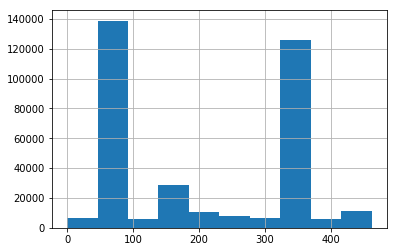

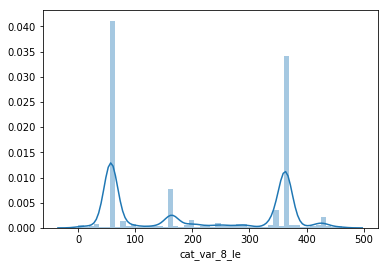

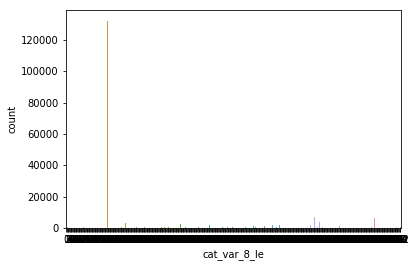

In [21]:
plot(x='cat_var_8_le',y='target',data=train,countplot=True)

transaction_id 

cannot plot histogram

transaction_id 

cannot plot distplot



num_var_1 



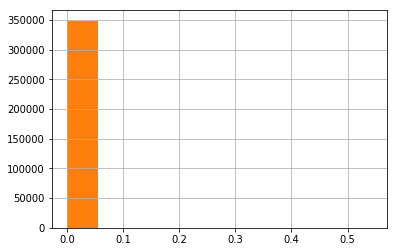

num_var_1 



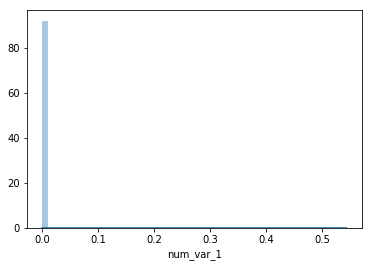



num_var_2 



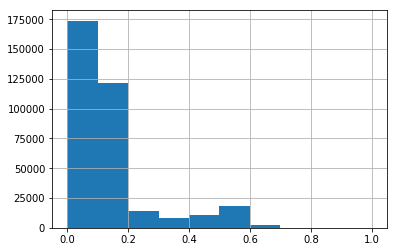

num_var_2 



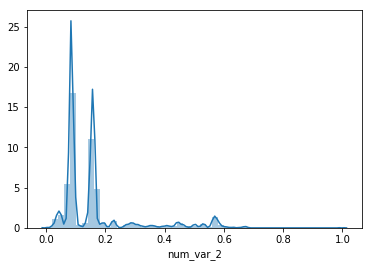



num_var_3 



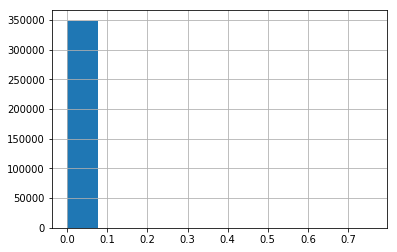

num_var_3 



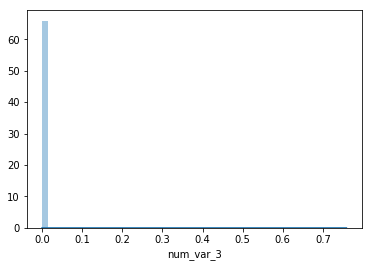



num_var_4 



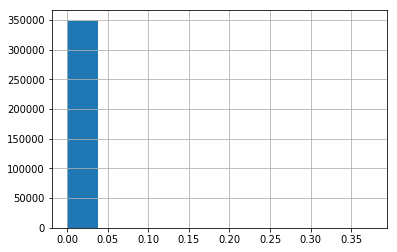

num_var_4 



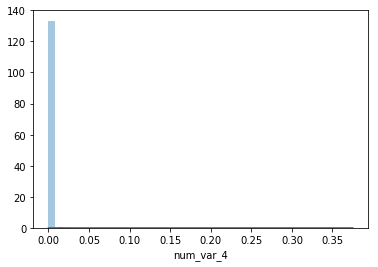



num_var_5 



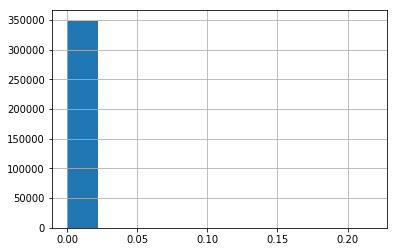

num_var_5 



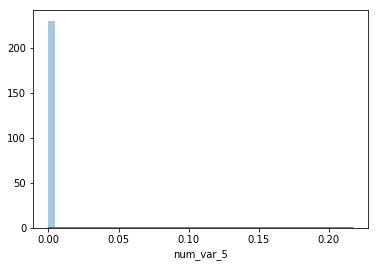



num_var_6 



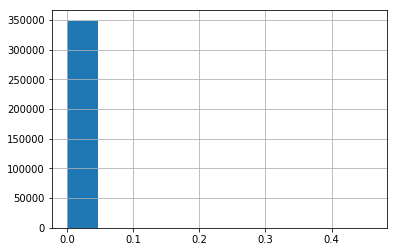

num_var_6 



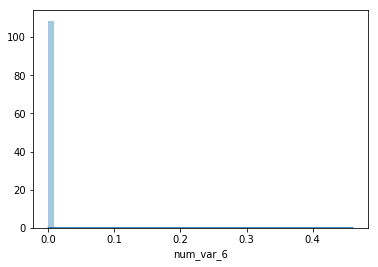



num_var_7 



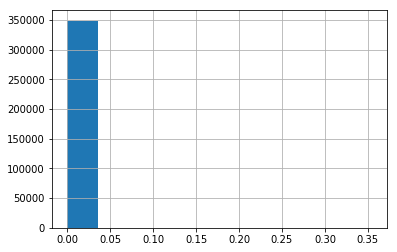

num_var_7 



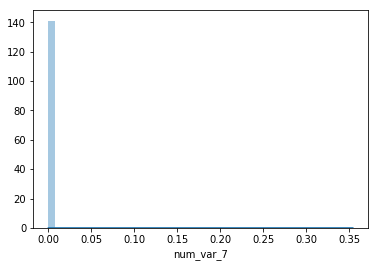



cat_var_1 

cannot plot histogram

cat_var_1 

cannot plot distplot



cat_var_2 

cannot plot histogram

cat_var_2 

cannot plot distplot



cat_var_3 

cannot plot histogram

cat_var_3 

cannot plot distplot



cat_var_4 

cannot plot histogram

cat_var_4 

cannot plot distplot



cat_var_5 

cannot plot histogram

cat_var_5 

cannot plot distplot



cat_var_6 

cannot plot histogram

cat_var_6 

cannot plot distplot



cat_var_7 

cannot plot histogram

cat_var_7 

cannot plot distplot



cat_var_8 

cannot plot histogram

cat_var_8 

cannot plot distplot



cat_var_9 

cannot plot histogram

cat_var_9 

cannot plot distplot



cat_var_10 

cannot plot histogram

cat_var_10 

cannot plot distplot



cat_var_11 

cannot plot histogram

cat_var_11 

cannot plot distplot



cat_var_12 

cannot plot histogram

cat_var_12 

cannot plot distplot



cat_var_13 

cannot plot histogram

cat_var_13 

cannot plot distplot



cat_var_14 

cannot plot histogram

cat_var_14 

cannot plot distpl

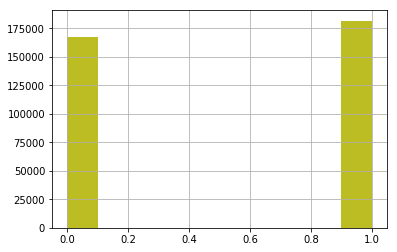

cat_var_19 



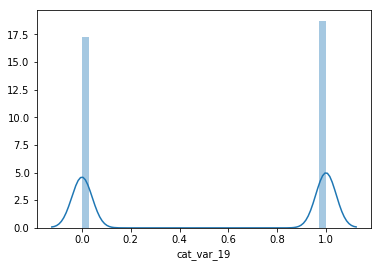



cat_var_20 



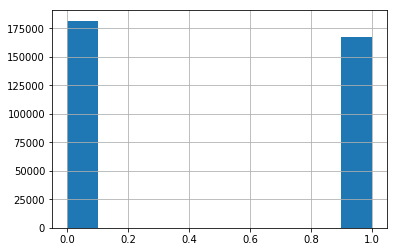

cat_var_20 



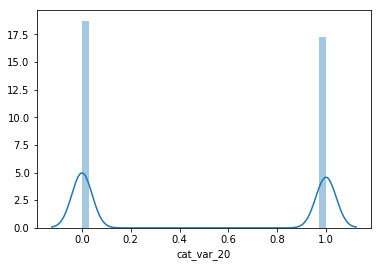



cat_var_21 



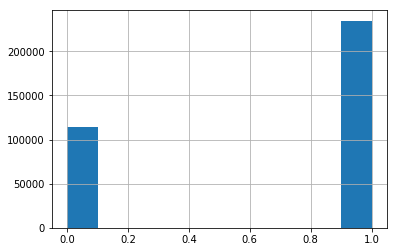

cat_var_21 



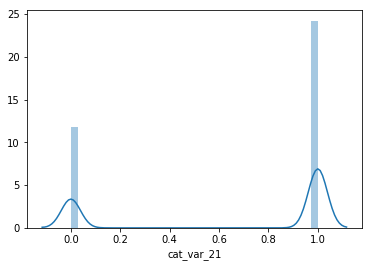



cat_var_22 



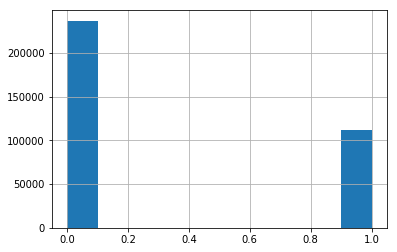

cat_var_22 



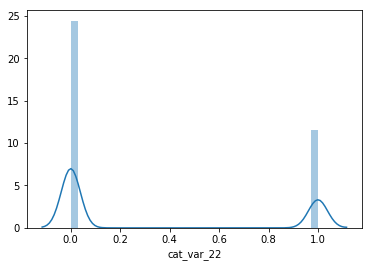



cat_var_23 



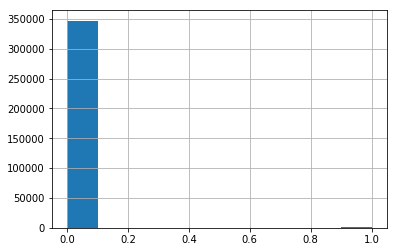

cat_var_23 



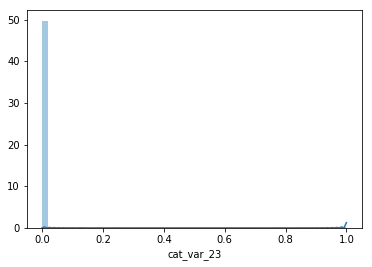



cat_var_24 



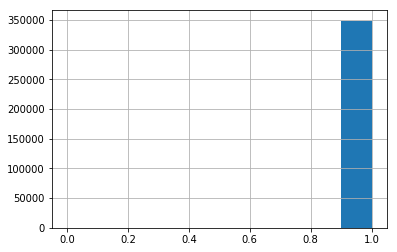

cat_var_24 



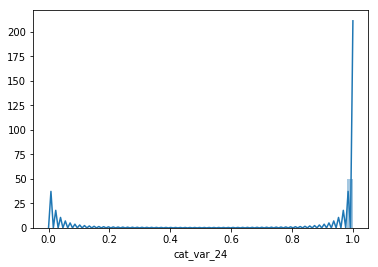



cat_var_25 



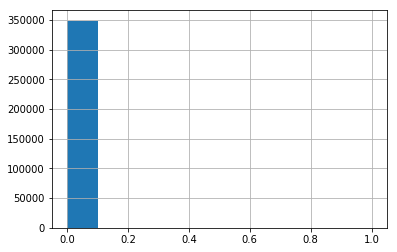

cat_var_25 



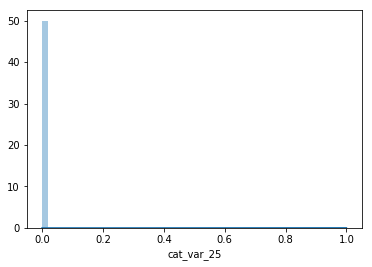



cat_var_26 



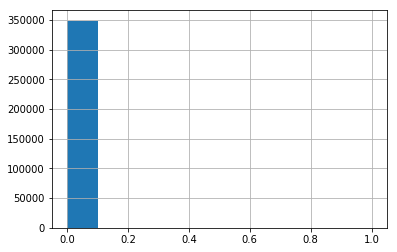

cat_var_26 



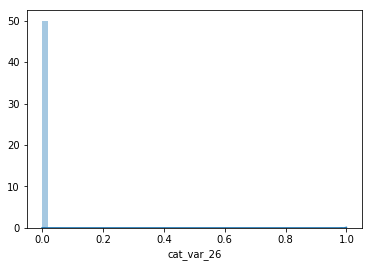



cat_var_27 



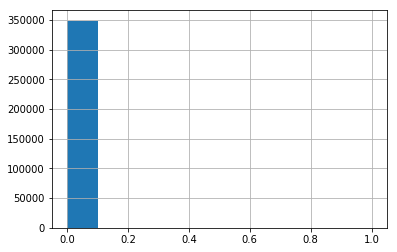

cat_var_27 



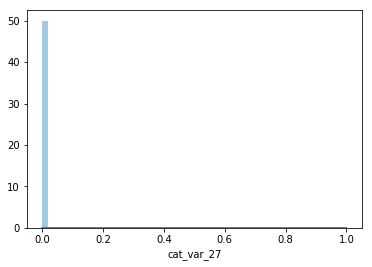



cat_var_28 



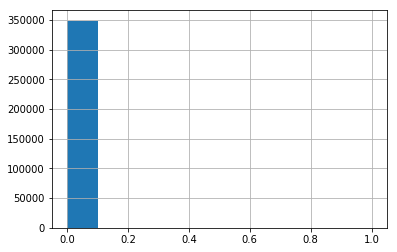

cat_var_28 



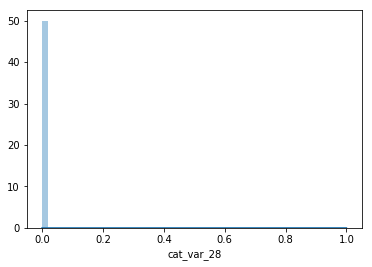



cat_var_29 



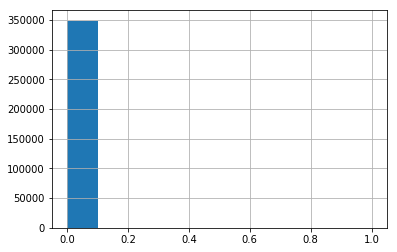

cat_var_29 



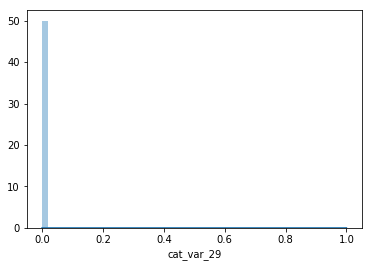



cat_var_30 



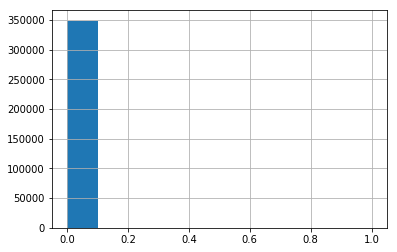

cat_var_30 



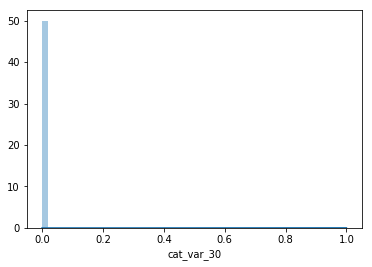



cat_var_31 



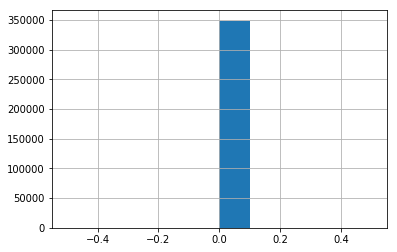

cat_var_31 



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


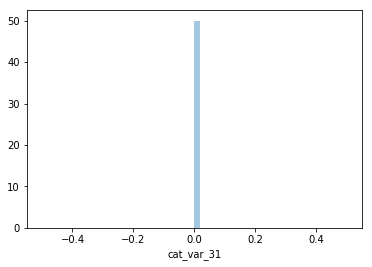



cat_var_32 



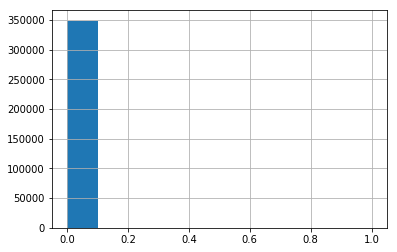

cat_var_32 



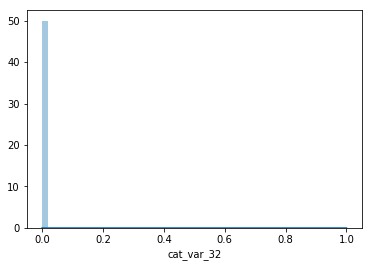



cat_var_33 



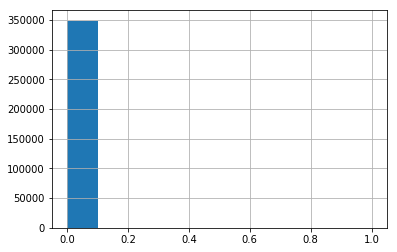

cat_var_33 



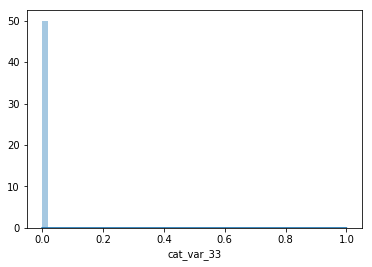



cat_var_34 



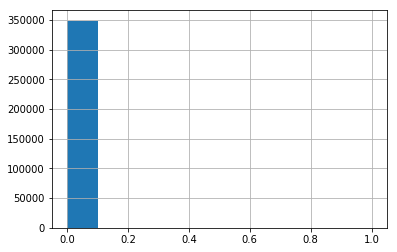

cat_var_34 



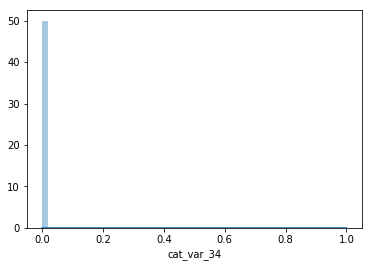



cat_var_35 



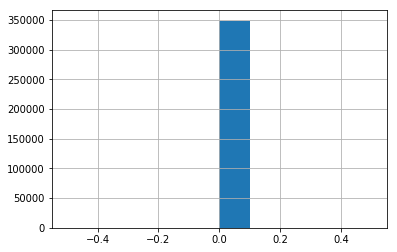

cat_var_35 



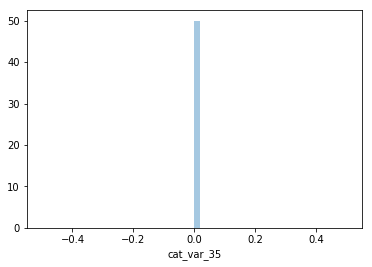



cat_var_36 



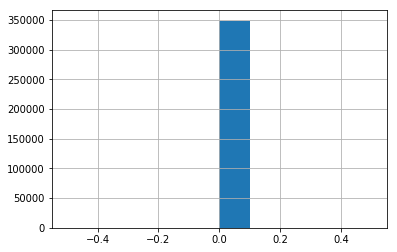

cat_var_36 



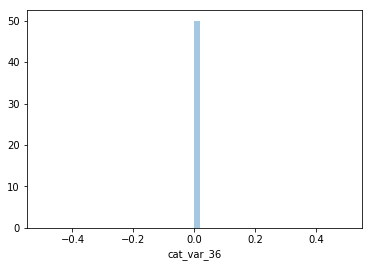



cat_var_37 



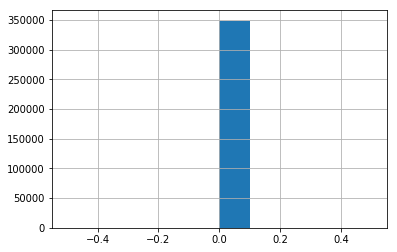

cat_var_37 



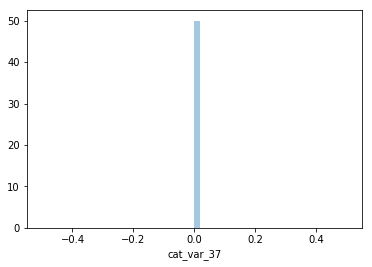



cat_var_38 



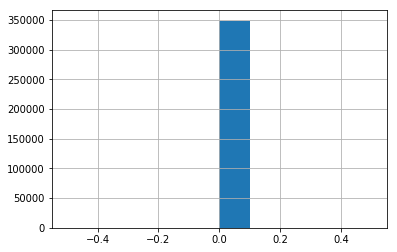

cat_var_38 



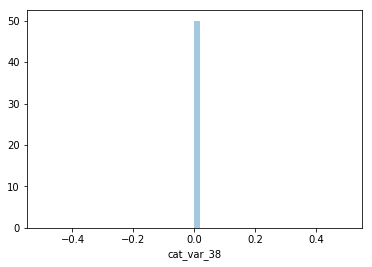



cat_var_39 



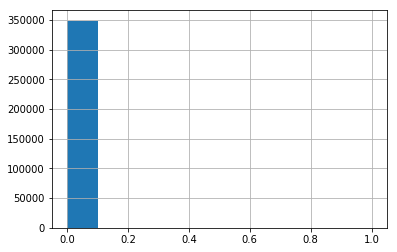

cat_var_39 



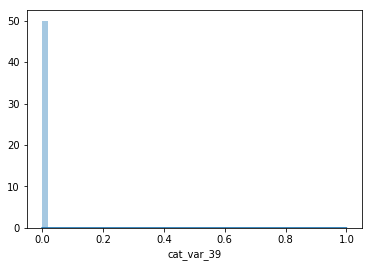



cat_var_40 



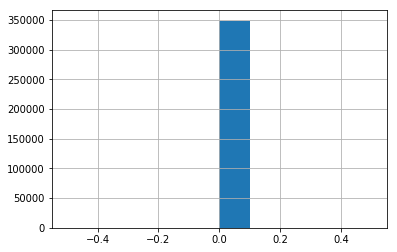

cat_var_40 



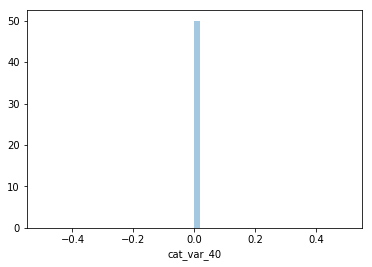



cat_var_41 



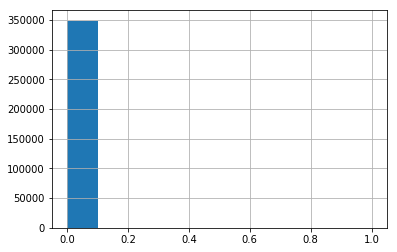

cat_var_41 



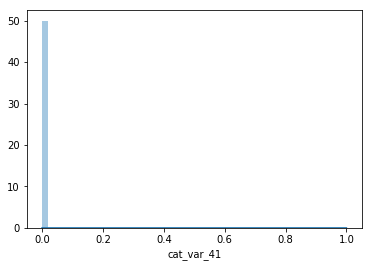



cat_var_42 



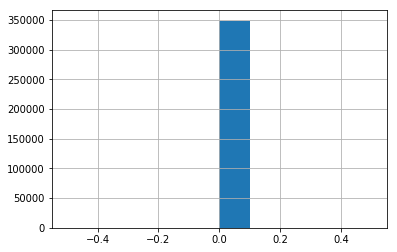

cat_var_42 



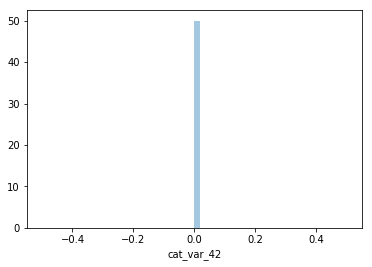



target 



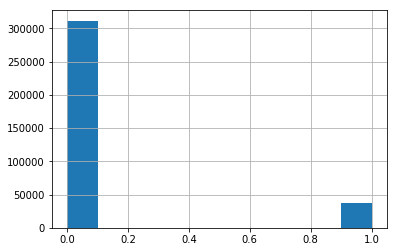

target 



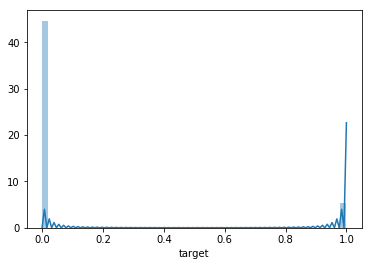



cat_var_1_le 



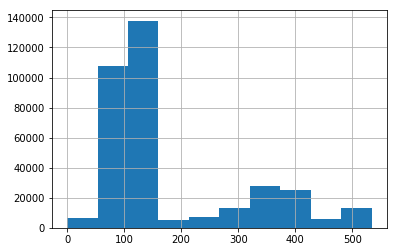

cat_var_1_le 



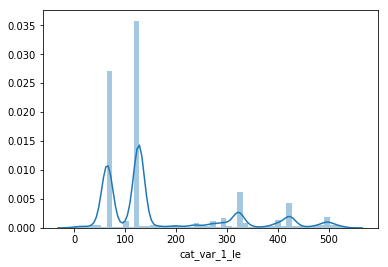



cat_var_3_le 



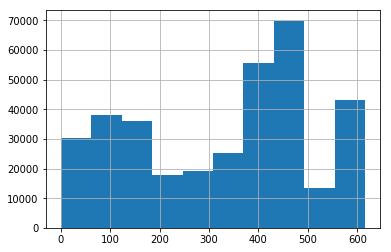

cat_var_3_le 



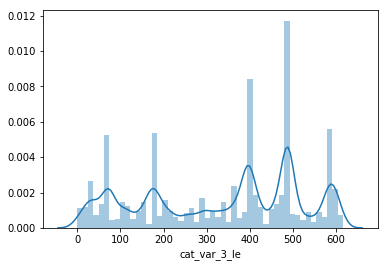



cat_var_8_le 



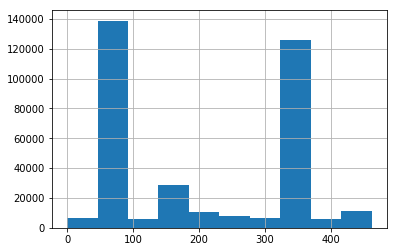

cat_var_8_le 



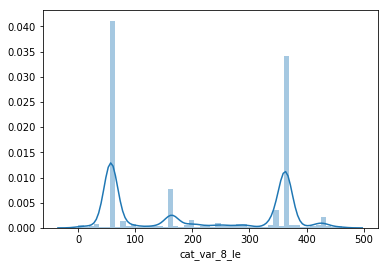

In [23]:
for i in train.columns:
    plot(x=i,data=train,name=i,y='return')
    print('\n')

cat_var_1 



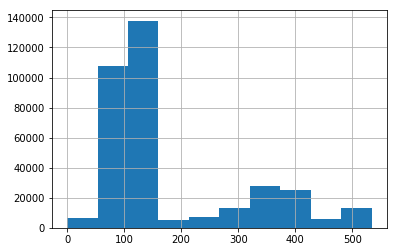

cat_var_1 



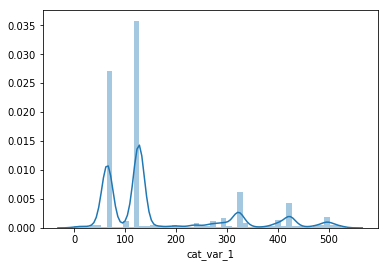



cat_var_2 



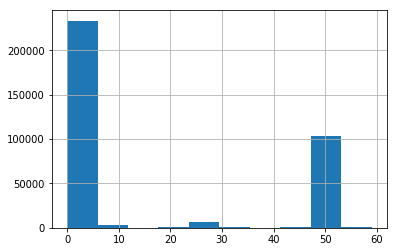

cat_var_2 



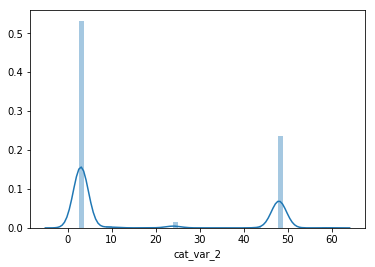



cat_var_3 



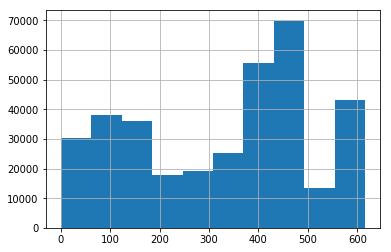

cat_var_3 



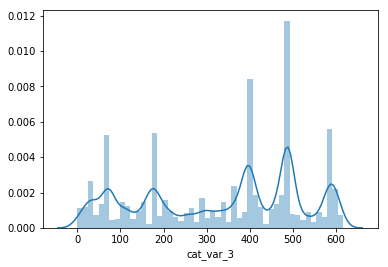



cat_var_4 



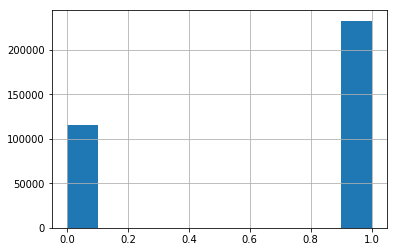

cat_var_4 



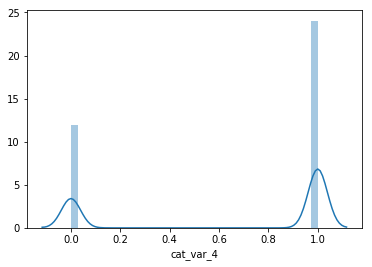



cat_var_5 



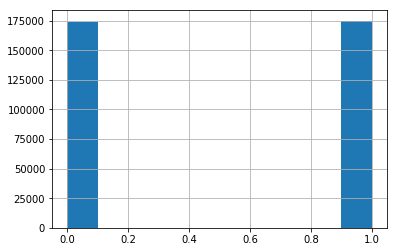

cat_var_5 



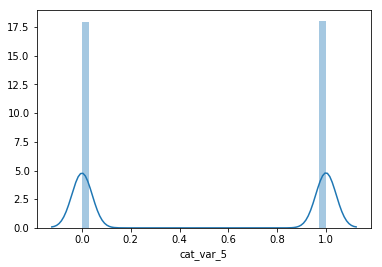



cat_var_6 



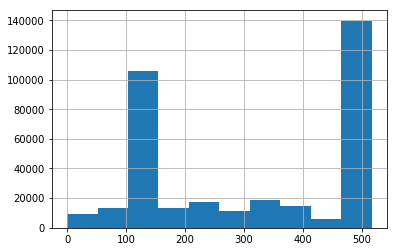

cat_var_6 



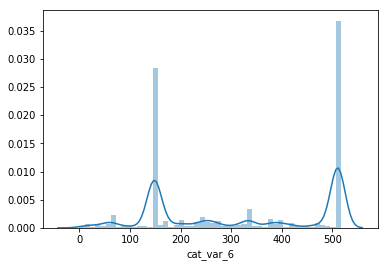



cat_var_7 



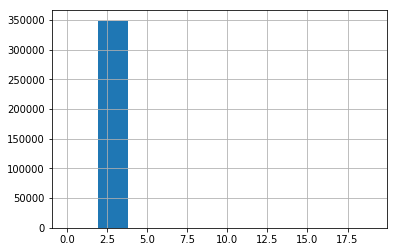

cat_var_7 



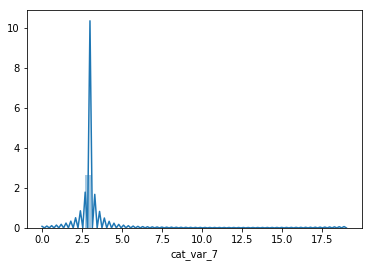



cat_var_8 



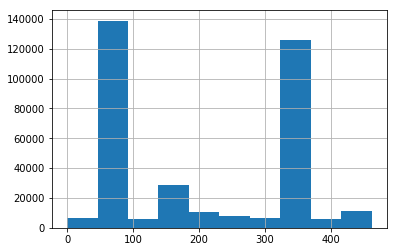

cat_var_8 



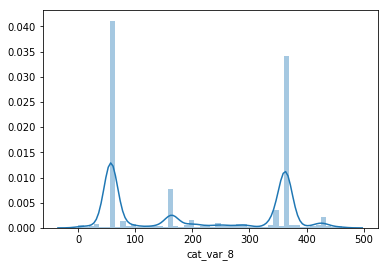



cat_var_9 



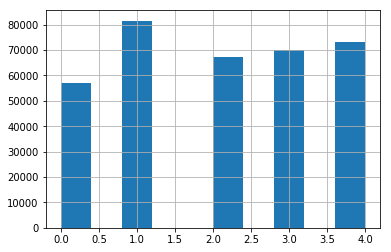

cat_var_9 



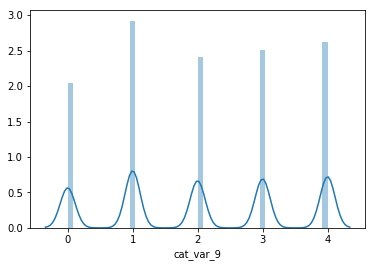



cat_var_10 



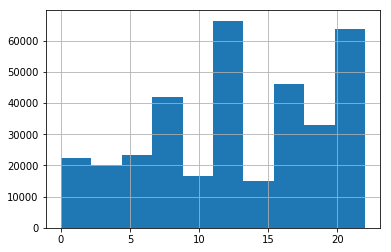

cat_var_10 



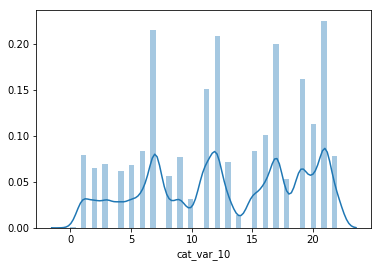



cat_var_11 



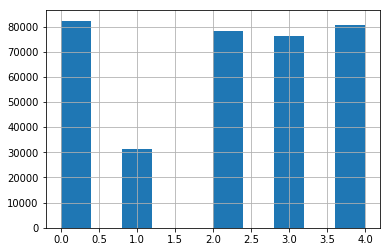

cat_var_11 



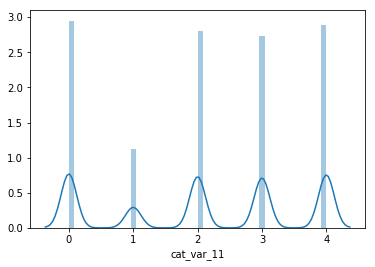



cat_var_12 



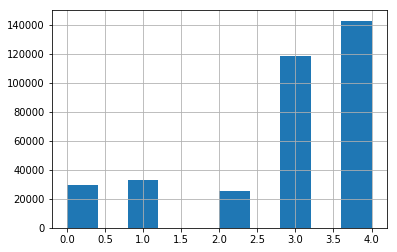

cat_var_12 



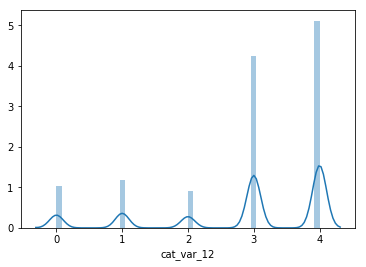



cat_var_13 



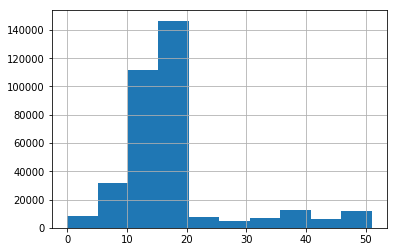

cat_var_13 



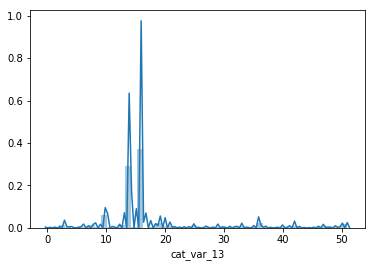



cat_var_14 



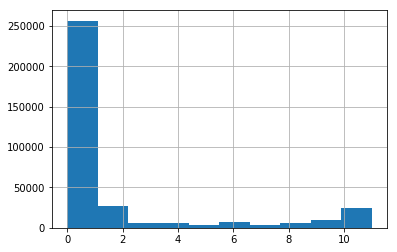

cat_var_14 



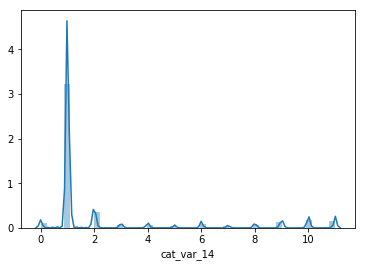



cat_var_15 



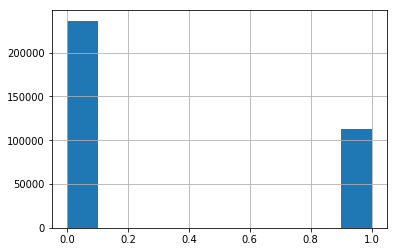

cat_var_15 



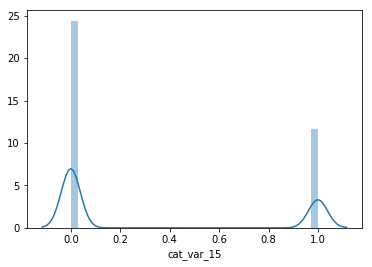



cat_var_16 



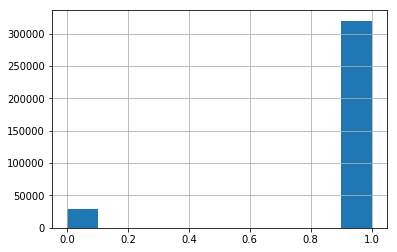

cat_var_16 



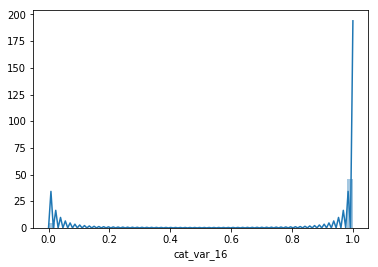



cat_var_17 



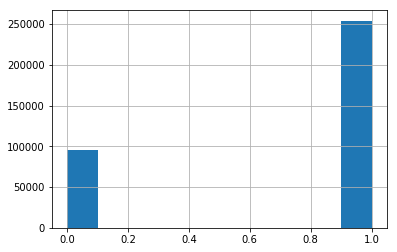

cat_var_17 



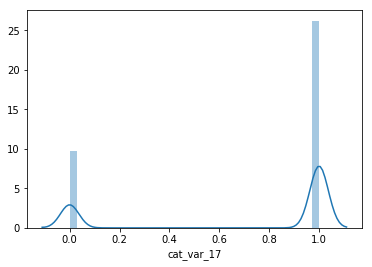



cat_var_18 



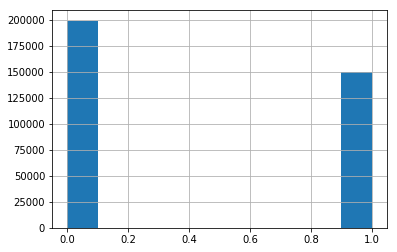

cat_var_18 



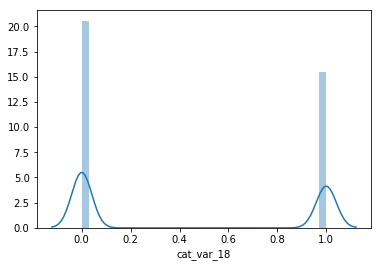



cat_var_19 



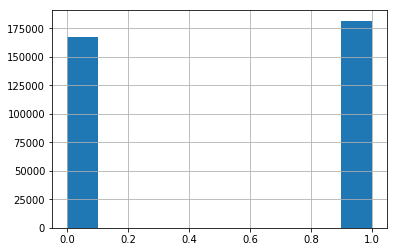

cat_var_19 



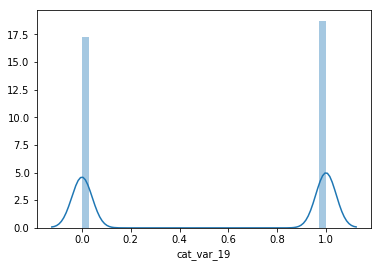



cat_var_20 



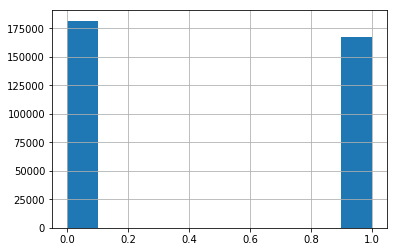

cat_var_20 



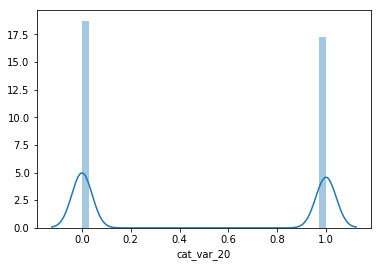



cat_var_21 



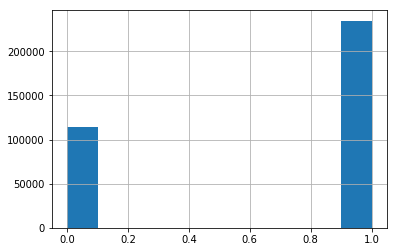

cat_var_21 



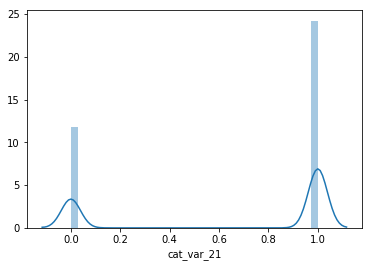



cat_var_22 



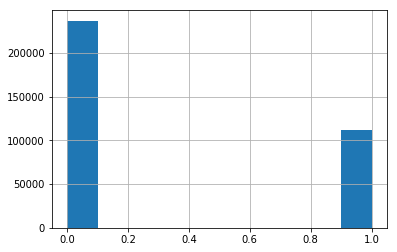

cat_var_22 



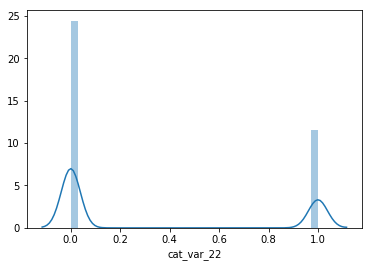



cat_var_23 



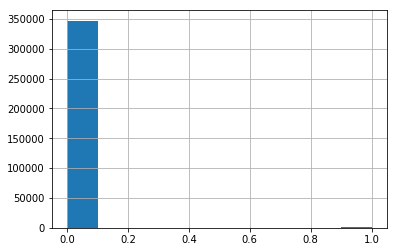

cat_var_23 



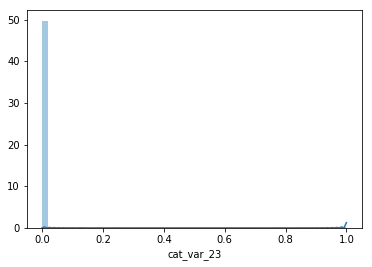



cat_var_24 



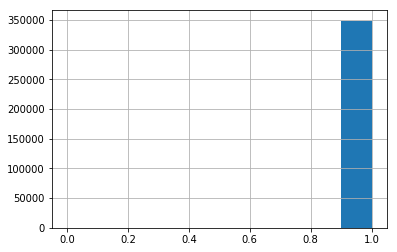

cat_var_24 



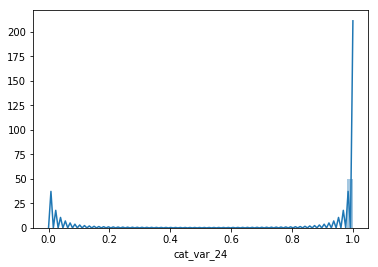



cat_var_25 



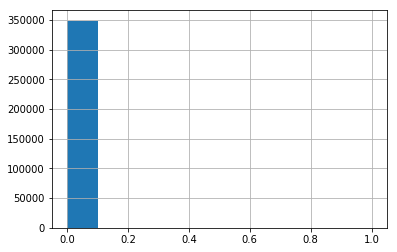

cat_var_25 



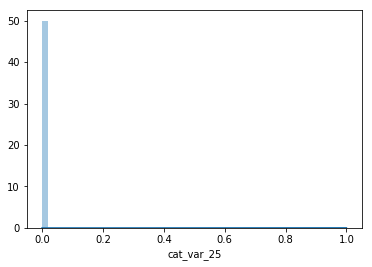



cat_var_26 



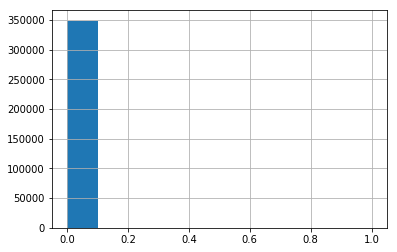

cat_var_26 



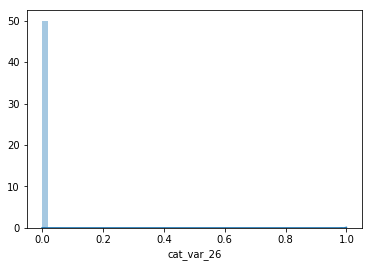



cat_var_27 



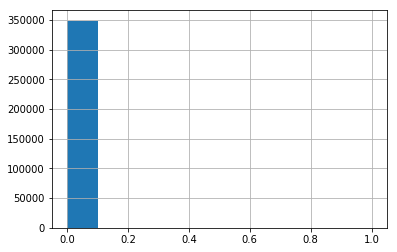

cat_var_27 



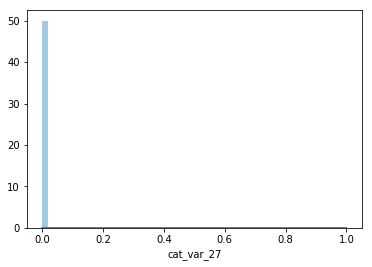



cat_var_28 



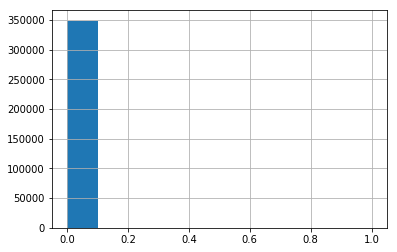

cat_var_28 



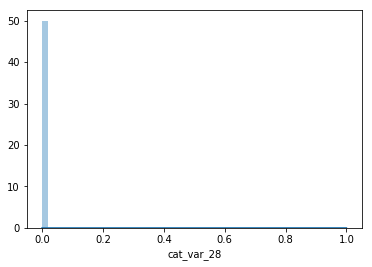



cat_var_29 



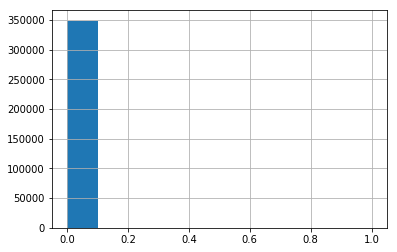

cat_var_29 



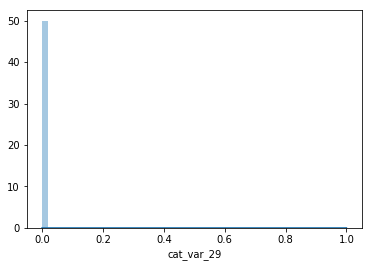



cat_var_30 



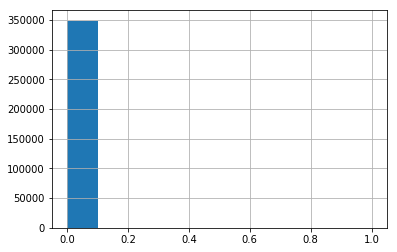

cat_var_30 



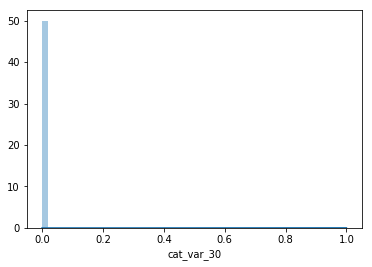



cat_var_31 



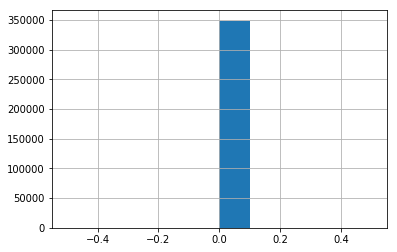

cat_var_31 



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


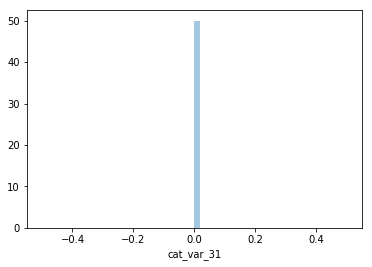



cat_var_32 



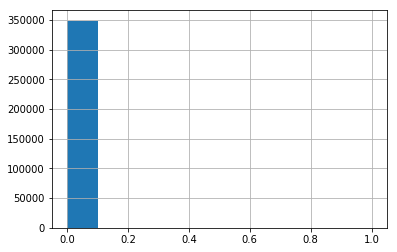

cat_var_32 



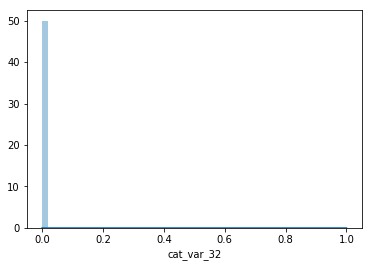



cat_var_33 



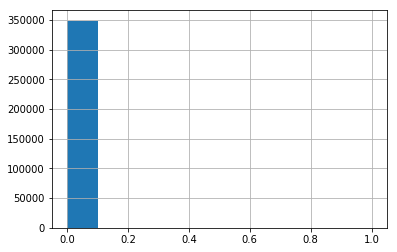

cat_var_33 



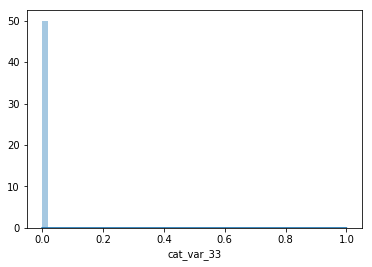



cat_var_34 



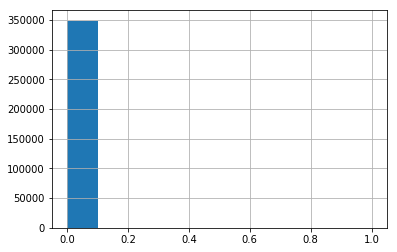

cat_var_34 



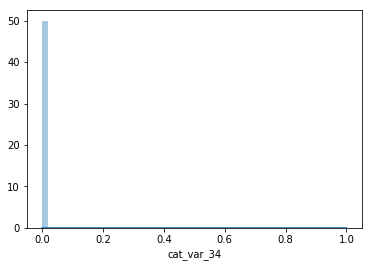



cat_var_35 



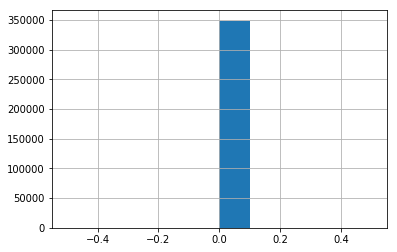

cat_var_35 



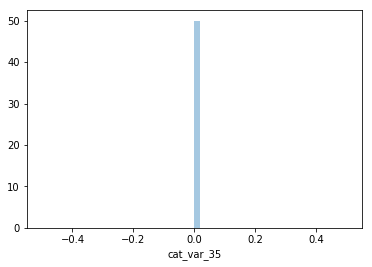



cat_var_36 



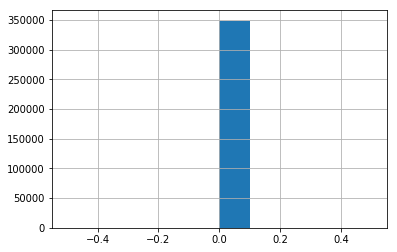

cat_var_36 



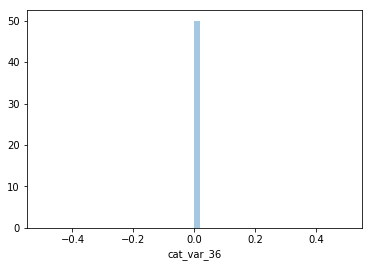



cat_var_37 



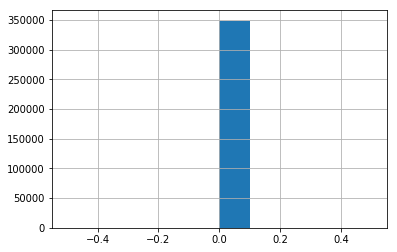

cat_var_37 



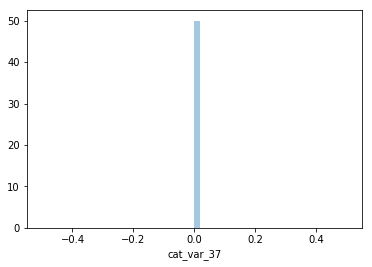



cat_var_38 



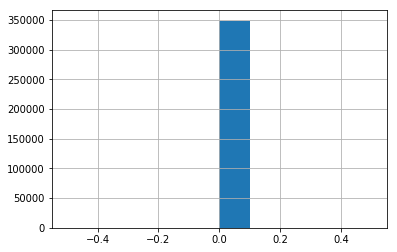

cat_var_38 



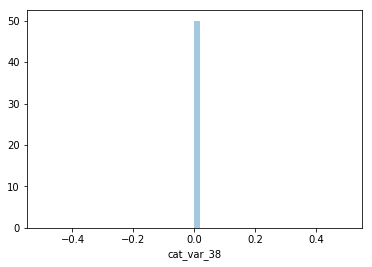



cat_var_39 



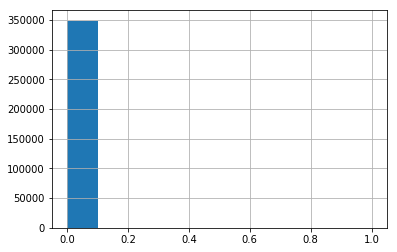

cat_var_39 



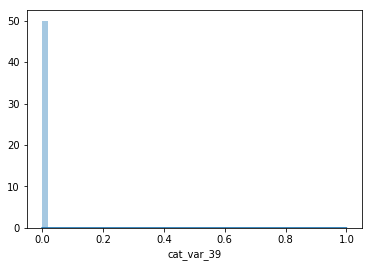



cat_var_40 



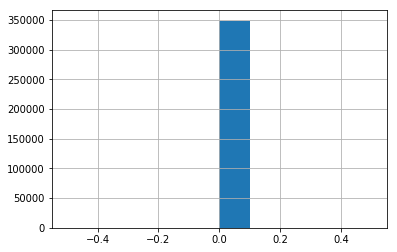

cat_var_40 



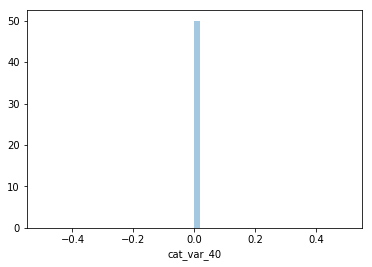



cat_var_41 



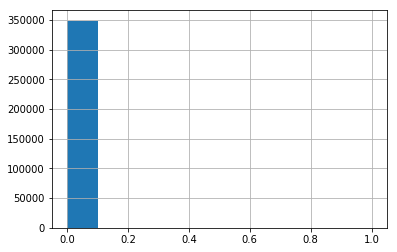

cat_var_41 



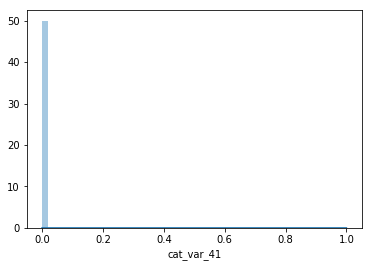



cat_var_42 



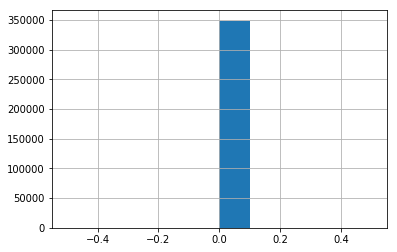

cat_var_42 



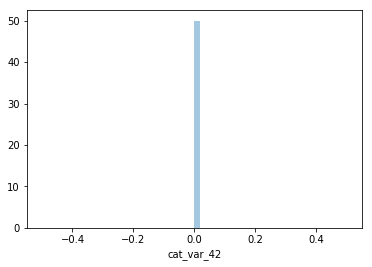



cat_var_1_le 



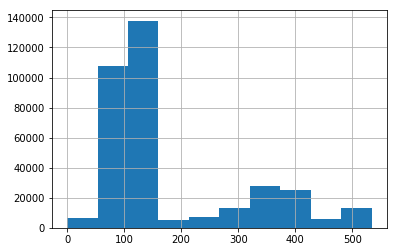

cat_var_1_le 



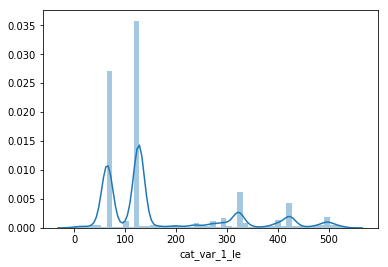



cat_var_3_le 



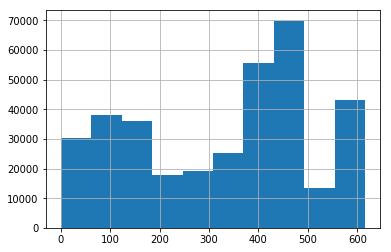

cat_var_3_le 



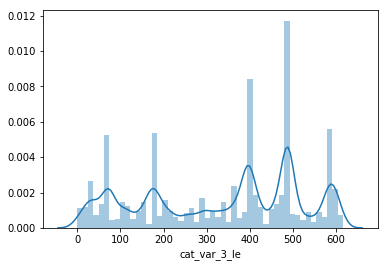



cat_var_8_le 



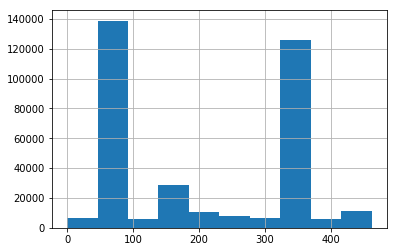

cat_var_8_le 



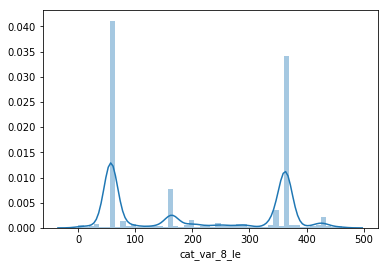

In [26]:
for i in train.columns:
    if 'cat' in i:
        train[i]=train[i].apply(lambda x:treat(x))
        train[i]=le.fit_transform(train[i].values)
        plot(x=i,data=train,name=i,y='return')
        print('\n')

In [ ]:
# from data_preprocessing kernel

show_percentile(x='num_var_7',data=test,ub=99.99,lb=0)
describe(train['cat_var_21'],with_plot=True)
describe(train['cat_var_22'],with_plot=True)
# data_type(train['cat_var_8'])


